In [82]:
import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv('all_reviews.csv')

In [84]:
df

,Movie_Name,Year,Reviews
0,Boyhood,2014,"["" Like Michael Apted in his Seven Up! documen..."
1,The Babadook,2014,[' A deftly inventive and psychologically char...
2,The LEGO Movie,2014,"[' The movie is a wonderful surprise, cleverly..."
3,Nightcrawler,2014,[' Like an alternate version of Network in whi...
4,Life Itself,2014,"["" With Ebert's blessing and encouragement, Li..."
5,Whiplash,2014,[' Revealing both the dangers and payoffs of a...
6,Birdman,2014,"[' Birdman, more than most, seems a film that ..."
7,Mr. Turner,2014,"["" Mike Leigh's biopic is so richly detailed t..."
8,"Two Days, One Night",2014,"["" Consider Marion Cotillard's Oscar-nominated..."
9,Gloria,2014,"["" We don't make movies in America like Gloria..."


In [85]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.misc import imread
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


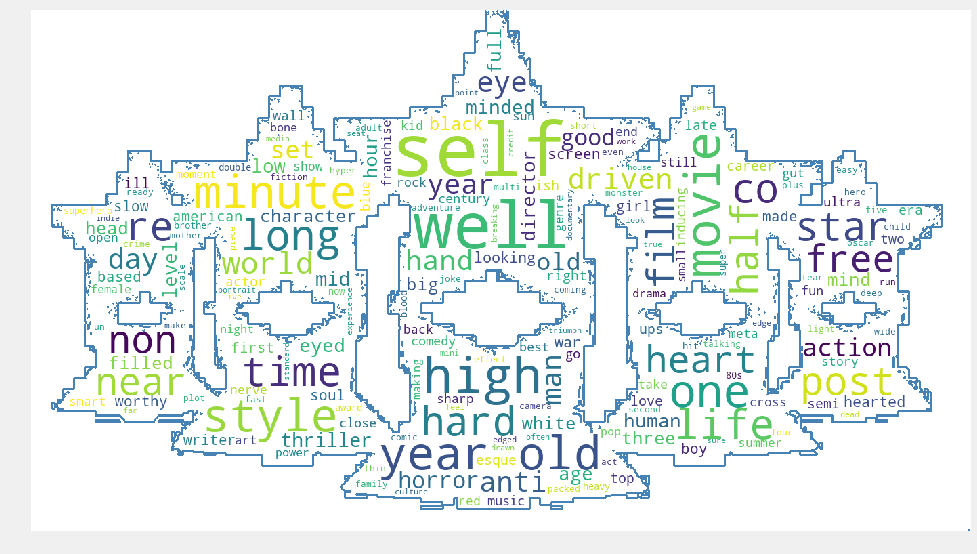

In [86]:
import nltk
from wordcloud import WordCloud, STOPWORDS
review=df['Reviews'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(review)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
origin_image = imread("Reviews.jpg")
origin_mask = origin_image
words_without_stop = nltk.FreqDist(w for w in words if w not in stopwords) 
wc = WordCloud(stopwords=STOPWORDS,background_color='white',mask=origin_mask, contour_width=3, 
               contour_color='steelblue').generate(" ".join(words_without_stop))
plt.imshow(wc)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.axis('off')
plt.show()

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import os

In [88]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

In [89]:
rev=df['Reviews']
def do_pos_neg_sentiment_analysis(text_rev,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_rev:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((cpos/len(word_tokenize(text)),cneg/len(word_tokenize(text))))
    return results

do_pos_neg_sentiment_analysis(rev)

[(0.050936768149882905, 0.0117096018735363),
 (0.03663613655287261, 0.044962531223980015),
 (0.06025824964131994, 0.024390243902439025),
 (0.04553624925104853, 0.04313960455362492),
 (0.05665930831493746, 0.01913171449595291),
 (0.03663423010875787, 0.027475672581568404),
 (0.05685218432076601, 0.02573309395571514),
 (0.05439005439005439, 0.028749028749028748),
 (0.043429844097995544, 0.02783964365256125),
 (0.04154302670623145, 0.028684470820969338),
 (0.05235602094240838, 0.035153328347045626),
 (0.050696378830083565, 0.024512534818941504),
 (0.046788990825688076, 0.05412844036697248),
 (0.05467625899280575, 0.04460431654676259),
 (0.06598240469208211, 0.01906158357771261),
 (0.05456453305351522, 0.026232948583420776),
 (0.050087361677344205, 0.021549213744903904),
 (0.0570944036178632, 0.02035048049745619),
 (0.054, 0.017),
 (0.06240713224368499, 0.017830609212481426),
 (0.030390738060781478, 0.04775687409551375),
 (0.041945288753799395, 0.02492401215805471),
 (0.04380242311276794, 

In [90]:
len(do_pos_neg_sentiment_analysis(rev))

500

In [91]:
pos_neg_list=do_pos_neg_sentiment_analysis(rev)
df_sub = pd.DataFrame(columns=['positive','negative'])
for i in range(len(pos_neg_list)):
    df_sub.loc[i,'positive']=pos_neg_list[i][0]
    df_sub.loc[i,'negative']=pos_neg_list[i][1]

In [92]:
df_sub

,positive,negative
0,0.0509368,0.0117096
1,0.0366361,0.0449625
2,0.0602582,0.0243902
3,0.0455362,0.0431396
4,0.0566593,0.0191317
5,0.0366342,0.0274757
6,0.0568522,0.0257331
7,0.0543901,0.028749
8,0.0434298,0.0278396
9,0.041543,0.0286845


In [93]:
df_pos_neg=pd.concat([df, df_sub], axis=1)

In [94]:
df_pos_neg

,Movie_Name,Year,Reviews,positive,negative
0,Boyhood,2014,"["" Like Michael Apted in his Seven Up! documen...",0.0509368,0.0117096
1,The Babadook,2014,[' A deftly inventive and psychologically char...,0.0366361,0.0449625
2,The LEGO Movie,2014,"[' The movie is a wonderful surprise, cleverly...",0.0602582,0.0243902
3,Nightcrawler,2014,[' Like an alternate version of Network in whi...,0.0455362,0.0431396
4,Life Itself,2014,"["" With Ebert's blessing and encouragement, Li...",0.0566593,0.0191317
5,Whiplash,2014,[' Revealing both the dangers and payoffs of a...,0.0366342,0.0274757
6,Birdman,2014,"[' Birdman, more than most, seems a film that ...",0.0568522,0.0257331
7,Mr. Turner,2014,"["" Mike Leigh's biopic is so richly detailed t...",0.0543901,0.028749
8,"Two Days, One Night",2014,"["" Consider Marion Cotillard's Oscar-nominated...",0.0434298,0.0278396
9,Gloria,2014,"["" We don't make movies in America like Gloria...",0.041543,0.0286845


In [95]:
def get_nrc_data():
    nrc = "/Users/scarlett/Desktop/4501 project/Rotten_Tomato_Project/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [96]:
emotion_dict=get_nrc_data()

In [97]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [101]:
def comparative_emotion_analyzer(text_rev):
    df_comp = pd.DataFrame(columns=['Fear','Trust','sub-Negative',
                           'sub-Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise','Anger'],)   
    dict_list=[]
    for text in text_rev:
        result=emotion_analyzer(text)
        dict_list.append(result)
        for i in range(len(dict_list)):
            df_comp.loc[i, 'Fear'] = dict_list[i]['fear']
            df_comp.loc[i, 'Trust'] = dict_list[i]['trust']
            df_comp.loc[i, 'sub-Negative'] = dict_list[i]['negative']
            df_comp.loc[i, 'sub-Positive'] = dict_list[i]['positive']
            df_comp.loc[i, 'Joy'] = dict_list[i]['joy']
            df_comp.loc[i, 'Disgust'] = dict_list[i]['disgust']
            df_comp.loc[i, 'Anticipation'] = dict_list[i]['anticipation']
            df_comp.loc[i, 'Sadness'] = dict_list[i]['sadness']
            df_comp.loc[i, 'Surprise'] = dict_list[i]['surprise']
            df_comp.loc[i, 'Anger'] = dict_list[i]['anger']
    return df_comp

In [105]:
df_comparative=comparative_emotion_analyzer(rev)

In [106]:
df_comprehensive=pd.concat([df_pos_neg, df_comparative], axis=1)

In [107]:
df_comprehensive

,Movie_Name,Year,Reviews,positive,negative,Fear,Trust,sub-Negative,sub-Positive,Joy,Disgust,Anticipation,Sadness,Surprise,Anger
0,Boyhood,2014,"["" Like Michael Apted in his Seven Up! documen...",0.0509368,0.0117096,0.00502874,0.0186782,0.00933908,0.0438218,0.0186782,0.000718391,0.0150862,0.00359195,0.00502874,0.00215517
1,The Babadook,2014,[' A deftly inventive and psychologically char...,0.0366361,0.0449625,0.0343782,0.016178,0.0525784,0.0374115,0.016178,0.0222447,0.016178,0.0343782,0.0202224,0.0252781
2,The LEGO Movie,2014,"[' The movie is a wonderful surprise, cleverly...",0.0602582,0.0243902,0.00616197,0.022007,0.0167254,0.0501761,0.0246479,0.00352113,0.0176056,0.00352113,0.0158451,0.00792254
3,Nightcrawler,2014,[' Like an alternate version of Network in whi...,0.0455362,0.0431396,0.0146199,0.0197368,0.0255848,0.0438596,0.0153509,0.00804094,0.0175439,0.0124269,0.00804094,0.0116959
4,Life Itself,2014,"["" With Ebert's blessing and encouragement, Li...",0.0566593,0.0191317,0.0145587,0.0291174,0.021838,0.0618744,0.0254777,0.00545951,0.0245678,0.00909918,0.0100091,0.00727934
5,Whiplash,2014,[' Revealing both the dangers and payoffs of a...,0.0366342,0.0274757,0.0134371,0.0219236,0.0240453,0.0417256,0.0212164,0.00919378,0.0183876,0.0106082,0.0148515,0.0141443
6,Birdman,2014,"[' Birdman, more than most, seems a film that ...",0.0568522,0.0257331,0.0141791,0.0253731,0.0223881,0.0470149,0.0238806,0.00820896,0.0231343,0.00671642,0.0126866,0.00970149
7,Mr. Turner,2014,"["" Mike Leigh's biopic is so richly detailed t...",0.0543901,0.028749,0.00771456,0.0221794,0.0260366,0.0501446,0.0231437,0.0125362,0.0183221,0.0106075,0.0115718,0.00867888
8,"Two Days, One Night",2014,"["" Consider Marion Cotillard's Oscar-nominated...",0.0434298,0.0278396,0.0111421,0.0264624,0.0181058,0.0431755,0.0125348,0.00417827,0.0181058,0.0097493,0.00557103,0.00557103
9,Gloria,2014,"["" We don't make movies in America like Gloria...",0.041543,0.0286845,0.00752823,0.0175659,0.0188206,0.0401506,0.0150565,0.00501882,0.0138018,0.0125471,0.00878294,0.00752823


In [108]:
df_comprehensive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
Movie_Name      500 non-null object
Year            500 non-null int64
Reviews         500 non-null object
positive        500 non-null object
negative        500 non-null object
Fear            500 non-null object
Trust           500 non-null object
sub-Negative    500 non-null object
sub-Positive    500 non-null object
Joy             500 non-null object
Disgust         500 non-null object
Anticipation    500 non-null object
Sadness         500 non-null object
Surprise        500 non-null object
Anger           500 non-null object
dtypes: int64(1), object(14)
memory usage: 58.7+ KB
